In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_peliculas = pd.read_csv('flixpatrol.csv')
df_peliculas 

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M
...,...,...,...,...,...,...,...
18159,18210.0,Spiritual House,TV Show,2017.0,Talk Show,"100,000",0.1M
18160,18211.0,Suite Francaise,Movie,2014.0,War,"100,000",0.1M
18161,18212.0,The Bishop's Bedroom,Movie,1977.0,Comedy,"100,000",0.1M
18162,18213.0,30 Chưa Phải Tết,Movie,2020.0,Comedy,"100,000",0.1M


In [5]:
valores_nulos = df_peliculas.isnull().sum()
valores_nulos

Rank                      0
Title                     0
Type                      0
Premiere                134
Genre                   180
Watchtime                 0
Watchtime in Million      0
dtype: int64

In [7]:
df_peliculas_c= df_peliculas.copy()
df_peliculas_c

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M
...,...,...,...,...,...,...,...
18159,18210.0,Spiritual House,TV Show,2017.0,Talk Show,"100,000",0.1M
18160,18211.0,Suite Francaise,Movie,2014.0,War,"100,000",0.1M
18161,18212.0,The Bishop's Bedroom,Movie,1977.0,Comedy,"100,000",0.1M
18162,18213.0,30 Chưa Phải Tết,Movie,2020.0,Comedy,"100,000",0.1M


In [8]:
df_peliculas_c['Premiere'].fillna('Unknown', inplace= True)
df_peliculas_c['Genre'].fillna('Unknown', inplace= True)


In [9]:
valores_nulos_n = df_peliculas_c.isnull().sum()
valores_nulos_n

Rank                    0
Title                   0
Type                    0
Premiere                0
Genre                   0
Watchtime               0
Watchtime in Million    0
dtype: int64

# Distribucion de generos 
## Cuantas peliculas y cuantos programas de television hay?

In [11]:
tipo_contenido = df_peliculas_c['Type'].value_counts()
tipo_contenido

Type
Movie      10880
TV Show     7284
Name: count, dtype: int64

In [16]:
etiquetas = tipo_contenido.index
valores = tipo_contenido.values
colores = ["#ff0054","#ffbd00"]


<function matplotlib.pyplot.show(close=None, block=None)>

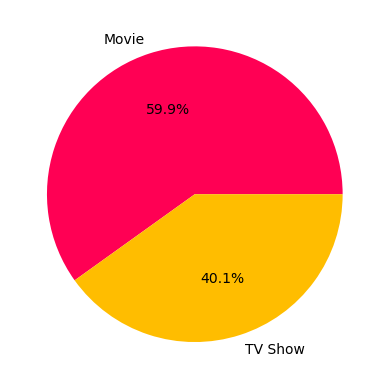

In [18]:
fig, ax = plt.subplots()
ax.pie(valores, labels = etiquetas, colors = colores, autopct = '%1.1f%%')
plt.show

## ¿Cuáles son los géneros más comunes y cuáles son los menos comunes?


In [20]:
tipos_generos = df_peliculas_c['Genre'].value_counts()
tipos_generos

Genre
Comedy             3946
Drama              3349
Animation          2670
Documentary        1294
Action             1100
Crime              1081
Thriller            675
Horror              654
Reality-Show        574
Romance             519
Science Fiction     398
Fantasy             303
Adventure           281
Stand-Up            224
Biography           199
Unknown             180
History             154
Superhero           143
War                  90
Talk Show            82
Family               72
Western              55
Musical              40
Broadcast            22
Concerts             20
Sports               17
Fairy Tale           12
Game-Show             9
News                  1
Name: count, dtype: int64

In [21]:
etiqueta_genero = tipos_generos.index
valores_genero = tipos_generos.values

<function matplotlib.pyplot.show(close=None, block=None)>

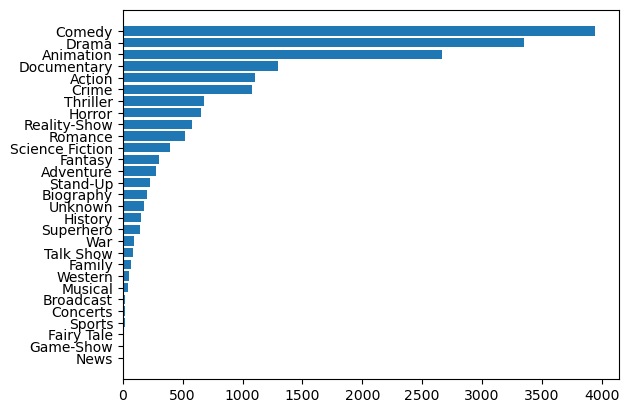

In [28]:
fig, ax = plt.subplots()
ax.barh(etiqueta_genero, width =  valores_genero)
ax.invert_yaxis()
plt.show


#  ¿Cuál es la tendencia temporal de estrenos?
## ¿Hay algún género que tienda a tener tiempos de visualización más largos que otros?

In [71]:
df_genero_tiempo = df_peliculas.loc[:,['Genre', 'Watchtime']]
df_genero_tiempo

,Genre,Watchtime
0,Action,"812,100,000"
1,Drama,"665,100,000"
2,Thriller,"622,800,000"
3,Fantasy,"507,700,000"
4,Drama,"503,000,000"
...,...,...
18159,Talk Show,"100,000"
18160,War,"100,000"
18161,Comedy,"100,000"
18162,Comedy,"100,000"


In [89]:
df_genero_tiempo['Watchtime'] = df_genero_tiempo['Watchtime'].astype(int)



Genre        object
Watchtime     int64
dtype: object

In [92]:
df_genero_tiempo_suma = df_genero_tiempo.groupby('Genre')['Watchtime'].sum()
df_genero_tiempo_suma

Genre
Action              6258600000
Adventure            982500000
Animation          14578900000
Biography            273500000
Broadcast             16400000
Comedy             14725700000
Concerts              11700000
Crime               9242900000
Documentary         3313800000
Drama              19344600000
Fairy Tale             2000000
Family               221900000
Fantasy             3607000000
Game-Show             13300000
History             2127100000
Horror              2543300000
Musical              189400000
News                   1400000
Reality-Show        3507000000
Romance             1046300000
Science Fiction     2889100000
Sports                71100000
Stand-Up             231100000
Superhero           2144800000
Talk Show             68700000
Thriller            4812700000
War                  457000000
Western              151300000
Name: Watchtime, dtype: int64

In [114]:
genero_mas_visto = df_genero_tiempo_suma.sort_values( ascending = False)
subtabla_top = genero_mas_visto.head(5)
subtabla_top

Genre
Drama        19344600000
Comedy       14725700000
Animation    14578900000
Crime         9242900000
Action        6258600000
Name: Watchtime, dtype: int64

In [115]:
genero_vistas = subtabla_top.index
total_vistas = subtabla_top.values

<Axes: xlabel='Genre'>

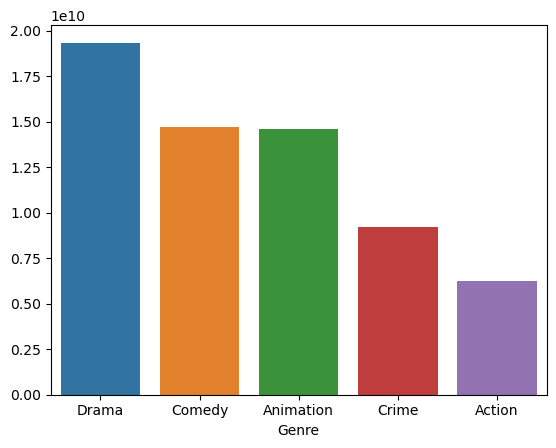

In [118]:
sns.barplot(x = genero_vistas, y = total_vistas)

## ¿Cómo varía la clasificación de visualización promedio entre películas y programas de televisión?

In [119]:
peli_series_visualizaciones = df_peliculas.loc[:,['Type', 'Watchtime']]
peli_series_visualizaciones 

,Type,Watchtime
0,TV Show,"812,100,000"
1,TV Show,"665,100,000"
2,TV Show,"622,800,000"
3,TV Show,"507,700,000"
4,TV Show,"503,000,000"
...,...,...
18159,TV Show,"100,000"
18160,Movie,"100,000"
18161,Movie,"100,000"
18162,Movie,"100,000"


In [121]:
peli_series_visualizaciones['Watchtime'] = peli_series_visualizaciones['Watchtime'].str.replace(',','')

In [122]:
peli_series_visualizaciones['Watchtime'] = peli_series_visualizaciones['Watchtime'].astype(int)

In [124]:
peli_serie_suma = peli_series_visualizaciones.groupby('Type')['Watchtime'].sum()
peli_serie_suma

Type
Movie      25279500000
TV Show    67707900000
Name: Watchtime, dtype: int64

In [132]:
visualizaciones_tipo = peli_serie_suma.index
datos_visualizacion = peli_serie_suma.values
colors= ['#ff6700', '#004e98']

<function matplotlib.pyplot.show(close=None, block=None)>

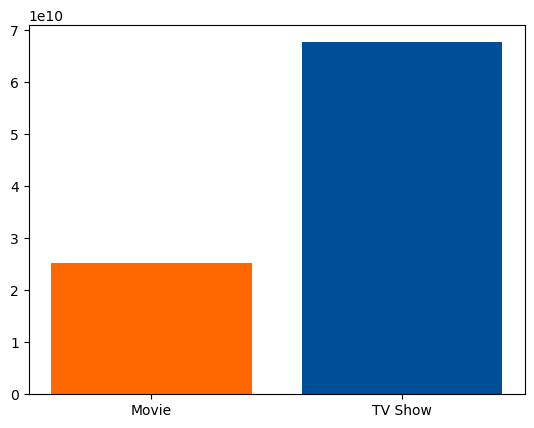

In [133]:
fig, ax = plt.subplots()
ax.bar(x = visualizaciones_tipo, height = datos_visualizacion, color = colors)
plt.show